In [1]:
from functions import *
from agent import *
from collaborate_rescue import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from functools import reduce
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def get_mean_and_std(lst):
    return np.average(lst), np.std(lst)

def get_trust(array):
    return (np.exp(array)-np.exp(-array))/(np.exp(array)+np.exp(-array))

## 最优型与任务型

### 协作绩效

In [4]:
# 低等信任
delta = 0.8
ita = 1
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [6]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.055, 0.0425, 0.0215, 0.0605, 0.0565, 0.043, 0.0625, 0.046, 0.0525, 0.067]

In [7]:
get_mean_and_std(task_counts)

(0.0507, 0.012480384609458156)

In [64]:
# 高等信任
delta = 0.2
ita = 1
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [65]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.073, 0.095, 0.0885, 0.071, 0.0805, 0.082, 0.0795, 0.086, 0.053, 0.0835]

In [66]:
get_mean_and_std(task_counts)

(0.0792, 0.010966312051004203)

### 信任演化

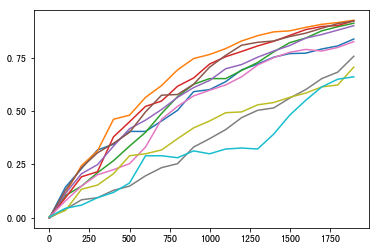

In [12]:
# 低等信任
deltas = 0.8
ita = 1
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

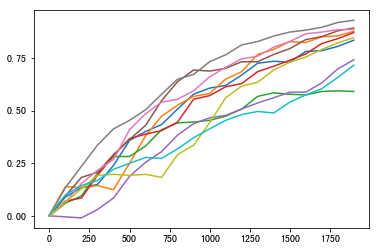

In [13]:
# 高等信任
deltas = 0.2
ita = 1
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [7]:
# 低等信任
delta = 0.8
ita = 1
w = 1

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)    
    break

In [15]:
cvgs_1

[0.8485, 0.8325, 0.8, 0.9765, 0.875, 0.958, 0.994, 0.9145, 0.937, 0.938]

In [16]:
get_mean_and_std(cvgs_1)

(0.9074, 0.061936580467442645)

In [17]:
# 高等信任
deltas = 0.2
ita = 1
w = 1

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)

In [18]:
cvgs_2

[0.7965, 0.786, 0.9655, 0.881, 0.9925, 0.779, 0.9765, 0.767, 0.9915, 0.336]

In [19]:
get_mean_and_std(cvgs_2) 

(0.8271500000000002, 0.186680214538124)

## 最优型与适应型

### 协作绩效

In [20]:
# 低等信任
delta = 0.8
ita = 1
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [21]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.1085, 0.1315, 0.0935, 0.107, 0.1385, 0.128, 0.1235, 0.128, 0.128, 0.1145]

In [22]:
# 低等信任
get_mean_and_std(task_counts)

(0.12010000000000001, 0.013085870242364475)

In [23]:
# 高等信任
delta = 0.2
ita = 1
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [24]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.115, 0.1095, 0.117, 0.122, 0.1135, 0.108, 0.1115, 0.1065, 0.098, 0.123]

In [25]:
# 高等信任
get_mean_and_std(task_counts)

(0.11240000000000001, 0.007102112361825882)

### 信任演化

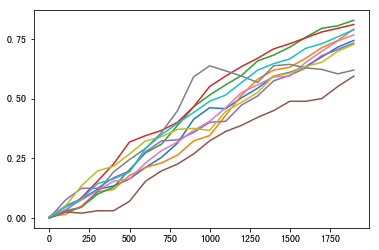

In [26]:
# 低等信任
delta = 0.8
ita = 1
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

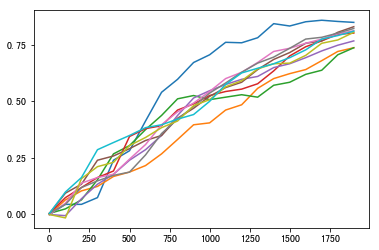

In [27]:
# 高等信任
deltas = 0.2
ita = 1
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [28]:
# 低等信任
deltas = 0.8
ita = 1
w = 0.5

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)

In [30]:
cvgs_1

[0.8985, 0.972, 0.7945, 0.8835, 0.912, 0.9185, 0.78, 0.9565, 0.9565, 0.789]

In [29]:
get_mean_and_std(cvgs_1) 

(0.8860999999999999, 0.06946106823249985)

In [33]:
# 高等信任
deltas = 0.2
ita = 1
w = 0.5

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)
cvgs_2

[0.8845, 0.731, 0.7775, 0.7545, 0.9125, 0.8675, 0.8445, 0.9955, 0.8835, 0.9025]

In [34]:
get_mean_and_std(cvgs_2)

(0.8553499999999999, 0.07663747451475683)

## 满意型与任务型

### 协作绩效

In [35]:
# 低等信任
delta = 0.8
ita = 0.5
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [36]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.046, 0.055, 0.0585, 0.0555, 0.051, 0.043, 0.0595, 0.032, 0.0415, 0.0565]

In [37]:
get_mean_and_std(task_counts)

(0.04985, 0.008497205422961127)

In [38]:
# 高等信任
delta = 0.2
ita = 0.5
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [39]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.073, 0.0845, 0.065, 0.078, 0.0895, 0.074, 0.067, 0.068, 0.0585, 0.082]

In [40]:
# 高等信任
get_mean_and_std(task_counts)

(0.07394999999999999, 0.009152731832627894)

### 信任演化

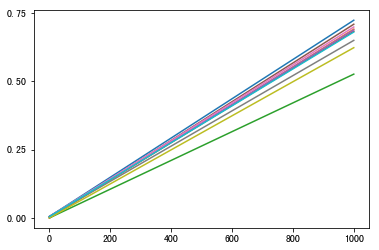

In [62]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

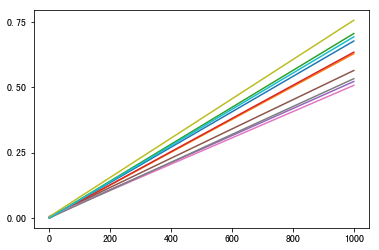

In [63]:
# 信任演化：高等
deltas = 0.2
ita = 0.5
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [43]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 1

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)

In [44]:
cvgs_1

[0.9875, 0.849, 0.9665, 0.6925, 0.798, 0.9645, 0.981, 0.9955, 0.994, 0.939]

In [45]:
get_mean_and_std(cvgs_1)

(0.9167500000000001, 0.09774079240521841)

In [46]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 1

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)

In [47]:
cvgs_2

[0.997, 0.938, 0.975, 0.989, 0.946, 0.964, 0.9255, 0.9905, 0.9335, 0.818]

In [48]:
get_mean_and_std(cvgs_2)

(0.94765, 0.0495908509707184)

## 满意型与适应型

### 协作绩效

In [49]:
# 低等信任
delta = 0.8
ita = 0.5
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [50]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.114, 0.115, 0.128, 0.126, 0.1185, 0.1185, 0.118, 0.1205, 0.1345, 0.122]

In [51]:
# 低等信任
get_mean_and_std(task_counts)

(0.12149999999999998, 0.006012487006222968)

In [52]:
# 高等信任
delta = 0.2
ita = 0.5
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [53]:
task_counts = [x.task_count.sum()/2000 for x in results]
task_counts

[0.1085, 0.102, 0.1085, 0.1115, 0.11, 0.105, 0.113, 0.104, 0.102, 0.1125]

In [54]:
# 高等信任
get_mean_and_std(task_counts)

(0.10769999999999999, 0.0039761790704142125)

### 信任演化

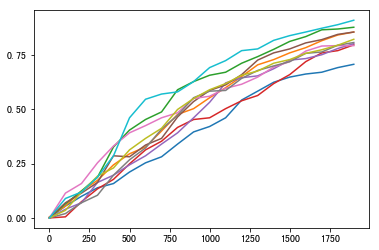

In [55]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

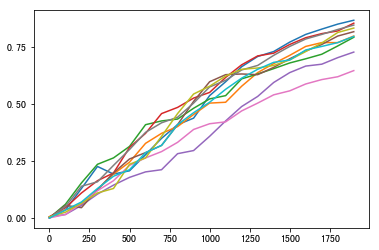

In [56]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [57]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 0.5

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)

In [58]:
cvgs_1

[0.587, 0.8155, 0.971, 0.9685, 0.831, 0.9425, 0.891, 0.3395, 0.8805, 0.514]

In [59]:
get_mean_and_std(cvgs_1)

(0.77405, 0.20649291150061302)

In [60]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 0.5

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/2000)
cvgs_2

[0.755, 0.6785, 0.942, 0.8435, 0.906, 0.9515, 0.9415, 0.895, 0.998, 0.672]

In [61]:
get_mean_and_std(cvgs_2)

(0.8583000000000001, 0.1112106559642555)

## 画图

In [ ]:
'''
机器人算法收敛

0.9074 0.8272
0.8861 0.8553
0.9168 0.9477
0.7741 0.8583

'''

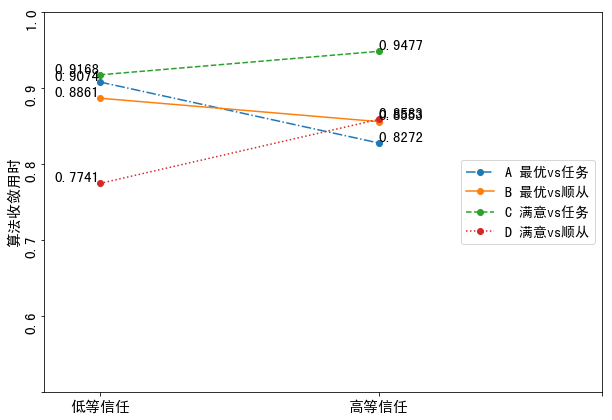

In [18]:
a = np.array([[[0.2, 0.9074], [1.2, 0.8272]],
             [[0.2, 0.8861], [1.2, 0.8553]],
             [[0.2, 0.9168], [1.2, 0.9477]],
             [[0.2, 0.7741], [1.2, 0.8583]]])

fig = plt.figure(figsize=(10,7))
plt.ylim(0.5, 1)
plt.xlim(0, 1)
plt.xticks([0.2, 1.2, 2.0], ['低等信任', '高等信任', ''],fontsize=15)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['', 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=15, rotation=90)
plt.plot(a[0][:, 0], a[0][:, 1], '-.', marker='o')
plt.plot(a[1][:, 0], a[1][:, 1], '-', marker='o')
plt.plot(a[2][:, 0], a[2][:, 1], '--', marker='o')
plt.plot(a[3][:, 0], a[3][:, 1], ':', marker='o')
plt.ylabel('算法收敛用时', fontsize=15)
for i in range(4):
    plt.text(a[i,0,0],a[i,0,1],a[i,0,1],ha='right', va='bottom', fontsize=15)
    plt.text(a[i,1,0],a[i,1,1],a[i,1,1],ha='left', va='bottom', fontsize=15)

plt.legend(['A 最优vs任务', 'B 最优vs顺从', 'C 满意vs任务', 'D 满意vs顺从'], loc='center right', fontsize=14)
plt.show()

In [ ]:
'''
协作绩效

0.0507 0.0792
0.1201 0.1124
0.0499 0.0739
0.1215 0.1077

'''

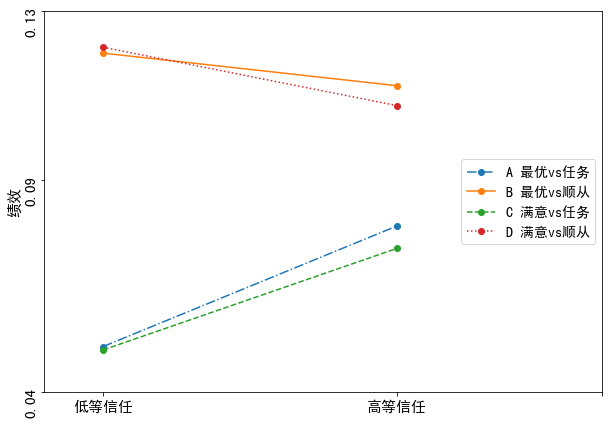

In [74]:
a = np.array([[[0.2, 0.0507], [1.2, 0.0792]],
             [[0.2, 0.1201], [1.2, 0.1124]],
             [[0.2, 0.0499], [1.2, 0.0739]],
             [[0.2, 0.1215], [1.2, 0.1077]]])

fig = plt.figure(figsize=(10,7))
plt.ylim(0.04, 0.13)
plt.xlim(0, 1)
plt.xticks([0.2, 1.2, 1.9], ['低等信任', '高等信任', ''],fontsize=15)
plt.yticks([0.04, 0.09, 0.13], [0.04, 0.09, 0.13], fontsize=15, rotation=90)
plt.plot(a[0][:, 0], a[0][:, 1], '-.', marker='o')
plt.plot(a[1][:, 0], a[1][:, 1], '-', marker='o')
plt.plot(a[2][:, 0], a[2][:, 1], '--', marker='o')
plt.plot(a[3][:, 0], a[3][:, 1], ':', marker='o')
plt.ylabel('绩效', fontsize=15)

plt.legend(['A 最优vs任务', 'B 最优vs顺从', 'C 满意vs任务', 'D 满意vs顺从'], loc='center right', fontsize=14)
plt.show()